In [1]:

# INDIR = "/data/Mito_Trace/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/vireo/nclones20"
# OUTDIR = "/data/Mito_Trace/output/pipeline/cd34norm/MTblacklist/results/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/vireo/nclones20/clones_dendro"
# DONOR = 3
# COUNT_INDIR = "/data/Mito_Trace/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/donor3/mgatk"
# var_type = "mgatkdonor"

#INDIR = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_30/"


# cells_meta_f = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/single_clones/donor0/cloneMethod_variants_init_mt_bestparams_af.0.1_othaf.0.1_cov.10_othcov.10_ncells.10_othncells.0.25_mean.0/clonalShift_method_mt_as_clones_dendro/cells_meta.tsv"
# outdir = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/single_clones/donor0/cloneMethod_variants_init_mt_bestparams_af.0.1_othaf.0.1_cov.10_othcov.10_ncells.10_othncells.0.25_mean.0/clonalShift_method_mt_as_clones_dendro/single/"

cells_meta_f = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/single_clones/donor0/cloneMethod_variants_init_mt_bestparams_af.0.1_othaf.0.1_cov.10_othcov.10_ncells.10_othncells.0.25_mean.0/clonalShift_method_mt_as_clones/cells_meta.tsv"
outdir = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/single_clones/donor0/cloneMethod_variants_init_mt_bestparams_af.0.1_othaf.0.1_cov.10_othcov.10_ncells.10_othncells.0.25_mean.0/clonalShift_method_mt_as_clones/top"

clone_order_f = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/single_clones/donor0/cloneMethod_variants_init_mt_bestparams_af.0.1_othaf.0.1_cov.10_othcov.10_ncells.10_othncells.0.25_mean.0/clonalShift_method_mt_as_clones/clones_ranked/cloneID_rank_ncells.txt"
ntop_clones = 10

#cloneID = "0_C6"

In [2]:
from os.path import join, exists, dirname
from glob import glob
import pickle
import mplh.cluster_help as ch
import mplh.fig_utils as fu

import os
import vireoSNP
import numpy as np
from scipy import sparse
from scipy.io import mmread
import matplotlib.pyplot as plt
from scipy.stats import hypergeom
print(vireoSNP.__version__)

import pandas as pd
import seaborn as sns
from vireoSNP import Vireo
np.set_printoptions(formatter={'float': lambda x: format(x, '.5f')})


plt.rcParams['svg.fonttype'] = 'none'

fig_utils from mplh
0.5.6


In [3]:
import seaborn as sns
from mplh import cluster_help as ch

In [4]:
clone_order = pd.read_csv(clone_order_f, header=None)[0].values
top_clones = clone_order[:ntop_clones]
top_clones

FileNotFoundError: [Errno 2] No such file or directory: '/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/single_clones/donor0/cloneMethod_variants_init_mt_bestparams_af.0.1_othaf.0.1_cov.10_othcov.10_ncells.10_othncells.0.25_mean.0/clonalShift_method_mt_as_clones/clones_ranked/cloneID_rank_ncells.txt'

In [ ]:
cells_meta = pd.read_csv(cells_meta_f,sep="\t", index_col=0)
cells_meta

## Filter for clone

In [ ]:
norm_condition = cells_meta.groupby("condition").size()
norm_condition

norm_lineage = cells_meta.groupby("clusterID").size()
norm_lineage

In [7]:
if "cloneID" not in cells_meta.columns:
    # cell can have multiple entries if contains multiple variants
    print("MT variants")
    cells_meta.columns = [x.replace("cloneID_", "") for x in cells_meta.columns]
    cells_meta = cells_meta.reset_index().melt(id_vars=["index", "donor", "clusterID", "condition"], 
                                               value_name="inClust", var_name="cloneID")
    cells_meta = cells_meta[cells_meta["inClust"]==1]
    top_cells_meta = cells_meta[cells_meta["cloneID"].isin(top_clones)]
    top_cells_meta
else:
    top_cells_meta = cells_meta[cells_meta["cloneID"].isin(top_clones)]
top_cells_meta

MT variants


,index,donor,clusterID,condition,cloneID,inClust
69328,AACCAACCAGAATGCG-1_Control,0,macrophage,Control,11812G,1
69351,AACGAGGCATTACACG-1_Control,0,erythroid,Control,11812G,1
69375,AAGATAGTCACAGGGA-1_Control,0,macrophage,Control,11812G,1
69391,AAGGTTCCACTCCCAT-1_Control,0,monocyte,Control,11812G,1
69411,AATGGAAGTCCAAGAG-1_Control,0,eosonophil,Control,11812G,1
...,...,...,...,...,...,...
526626,GATGATCGTCATAAGA-1_Input,0,MPP/CMP/GMP B,Input,8697A,1
526960,GCTTTCGTCAATTCCT-1_Input,0,MEP,Input,8697A,1
527652,TCCCACAAGGTCTTTG-1_Input,0,DC,Input,8697A,1
527801,TGATTTCTCCACGGCA-1_Input,0,CLP,Input,8697A,1


In [8]:
def plot_bar(data, **kwargs):
    f_df = data.pivot(index="clusterID", columns="condition", values=0).fillna(0)
    f_df.plot.bar(stacked=True, ax=plt.gca())
    return

In [9]:
top_clones

array(['5581G', '1949A', '5147A', '4117C', '14233G', '8697A', '13368A',
       '15607G', '11812G', '709A'], dtype=object)

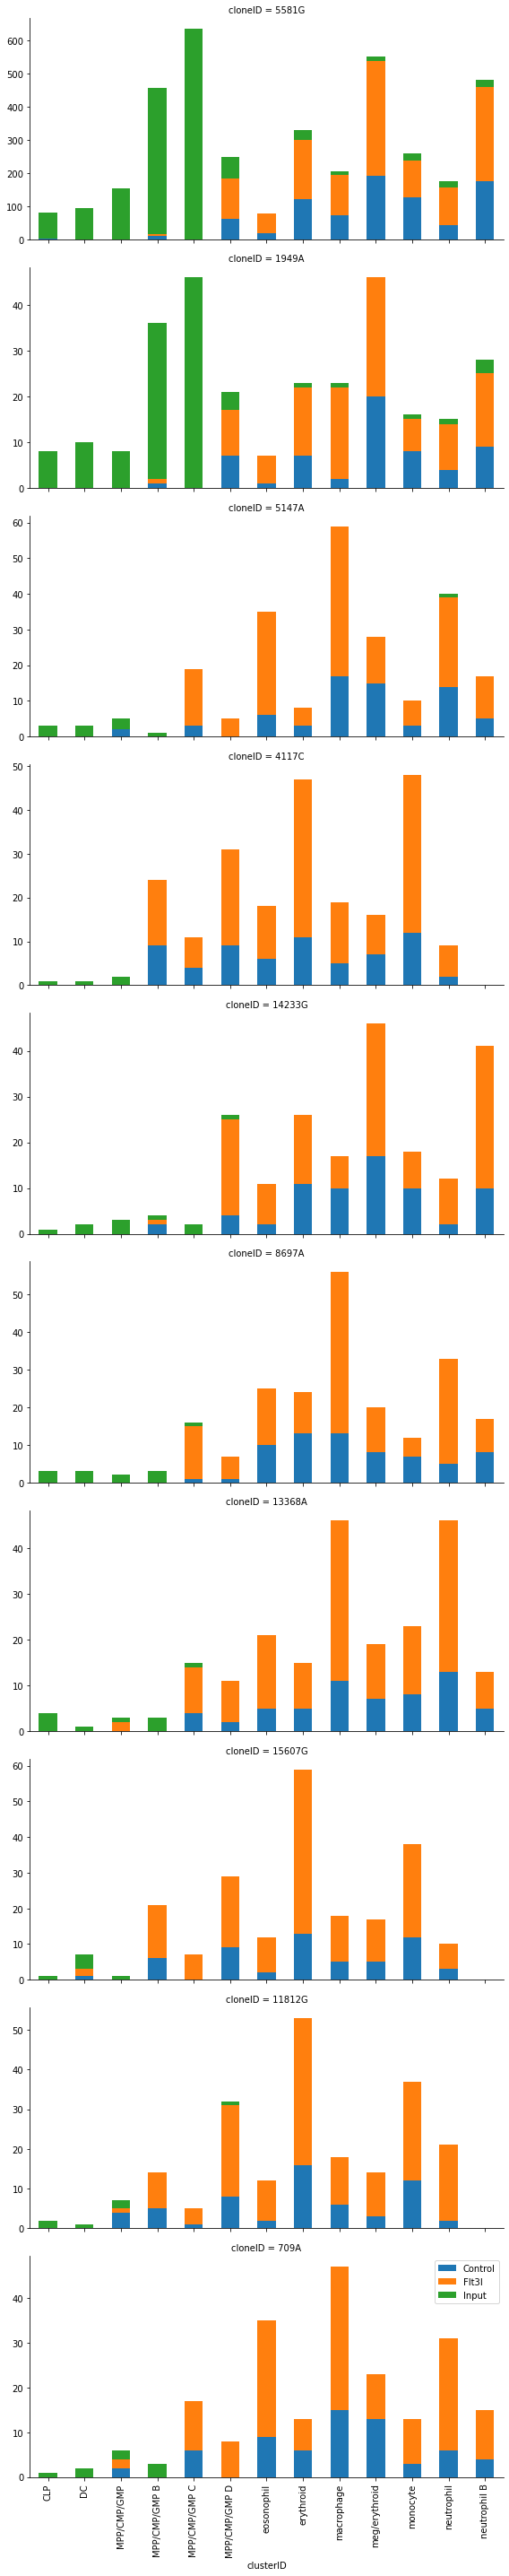

In [10]:
curr_cells_group = top_cells_meta.groupby(["clusterID", "cloneID", "condition"]).size().reset_index()
curr_cells_group

g = sns.FacetGrid(data=curr_cells_group, col="cloneID", col_order=top_clones, sharey=False,
                  col_wrap=1, height=4, aspect=2)

g.map_dataframe(plot_bar, axis=1)

#              height=4*top_clones, width=2*4*top_clones
#.pivot(index="clusterID", columns="condition", values=0).fillna(0)
# curr_cells_group.plot.bar(stacked=True, ax=ax)
plt.legend(loc='best')
g.fig.savefig(fname=join(outdir, f"top_cluster_condition_ncells.svg"), dpi=500, bbox_inches='tight', pad_inches=0.5)
#g.fig.savefig(fname=join(outdir, f"top_cluster_condition_ncells.pdf"), dpi=500, bbox_inches='tight', pad_inches=0.5)


In [11]:
print(outdir)

/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/single_clones/donor0/cloneMethod_variants_init_mt_bestparams_af.0.1_othaf.0.1_cov.10_othcov.10_ncells.10_othncells.0.25_mean.0/clonalShift_method_mt_as_clones/top


In [12]:
# for clone_id, curr_cells in cells_meta.groupby("cloneID"):
#     print(clone_id)

#     curr_dir = join(outdir, f"cloneID_{clone_id}")
#     if not exists(curr_dir):
#         os.mkdir(curr_dir)
        
#     f, ax = plt.subplots(figsize=(12,12), dpi=300)

#     curr_cells_group = curr_cells.groupby(["clusterID", "condition"]).size().reset_index().pivot(index="clusterID", columns="condition", values=0).fillna(0)
#     curr_cells_group.plot.bar(stacked=True, ax=ax)
#     plt.savefig(join(curr_dir, "cluster_condition_ncells.pdf"))
#     f, ax = plt.subplots(figsize=(12,12), dpi=300)
#     curr_cells_group_norm = curr_cells_group.apply(lambda x: x/norm_condition.loc[x.name], axis=0)
#     curr_cells_group_norm.plot.bar(stacked=True, ax=ax)
#     plt.savefig(join(curr_dir, "cluster_condition_ncells_norm.pdf"))
    
#     f, ax = plt.subplots(figsize=(12,12), dpi=300)
#     curr_cells_lineage_group = curr_cells.groupby(["clusterID", "condition"]).size().reset_index().pivot(columns="clusterID", index="condition", values=0).fillna(0)
#     curr_cells_group_norm = curr_cells_lineage_group.apply(lambda x: x/norm_lineage.loc[x.name], axis=0)
#     curr_cells_lineage_group.plot.bar(stacked=True, ax=ax)
#     plt.savefig(join(curr_dir, "cluster_lineage_splitCondition_ncells_norm.pdf"))
#     plt.close('all')